In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#load the dataset and display it
df = pd.read_csv('eda_data.csv')
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,0,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,1,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,1,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,1,22,1,0,0,0,1,data scientist,na,2728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,0,58,111,84.5,GSK,MA,0,190,0,0,0,1,0,na,senior,6162,3
738,738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0,72,133,102.5,Eventbrite,TN,0,14,1,0,1,1,0,data engineer,senior,6130,3
739,739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,0,56,91,73.5,Software Engineering Institute,PA,1,36,0,0,0,0,1,na,na,3078,0
740,740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,0,95,160,127.5,"Numeric, LLC",PA,0,-1,0,0,0,0,1,manager,na,1642,0


In [66]:
#show available columns
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [67]:
#drop unnecessary or redundant columns that are not useful for prediction
df.drop(columns=[
    'Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description', 
    'Location','Headquarters','company_txt', 'Competitors','min_salary', 
    'max_salary', 'desc_len', 'same_state','employer_provided','Company Name'
],inplace=True)

In [68]:
#rename columns for readability
df.rename(columns={
    'job_simp': 'Job Role',
    'num_comp': 'Number of Competitors',
    'seniority': 'Seniority Level',
    'R_yn': 'R Required',
    'python_yn':'Python Required',
    'spark':'Spark Required',
    'aws':'AWS Required',
    'excel':'Excel Required'
}, inplace=True)

In [69]:
#display updated column names
df.columns

Index(['Rating', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'hourly', 'avg_salary', 'job_state', 'age',
       'Python Required', 'R Required', 'Spark Required', 'AWS Required',
       'Excel Required', 'Job Role', 'Seniority Level',
       'Number of Competitors'],
      dtype='object')

In [70]:
#check for missing values
df.isnull().sum()

Rating                   0
Size                     0
Founded                  0
Type of ownership        0
Industry                 0
Sector                   0
Revenue                  0
hourly                   0
avg_salary               0
job_state                0
age                      0
Python Required          0
R Required               0
Spark Required           0
AWS Required             0
Excel Required           0
Job Role                 0
Seniority Level          0
Number of Competitors    0
dtype: int64

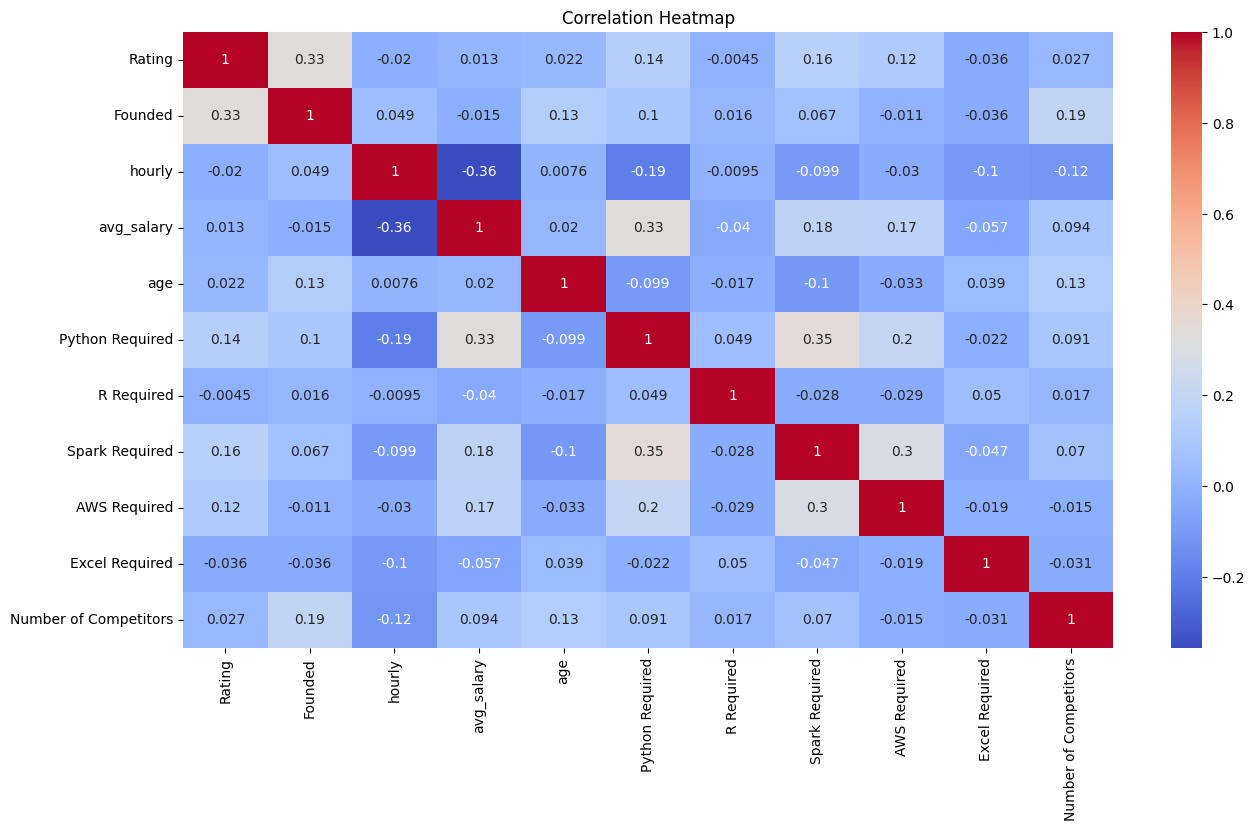

In [71]:
#correlation heatmap of numerical features
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

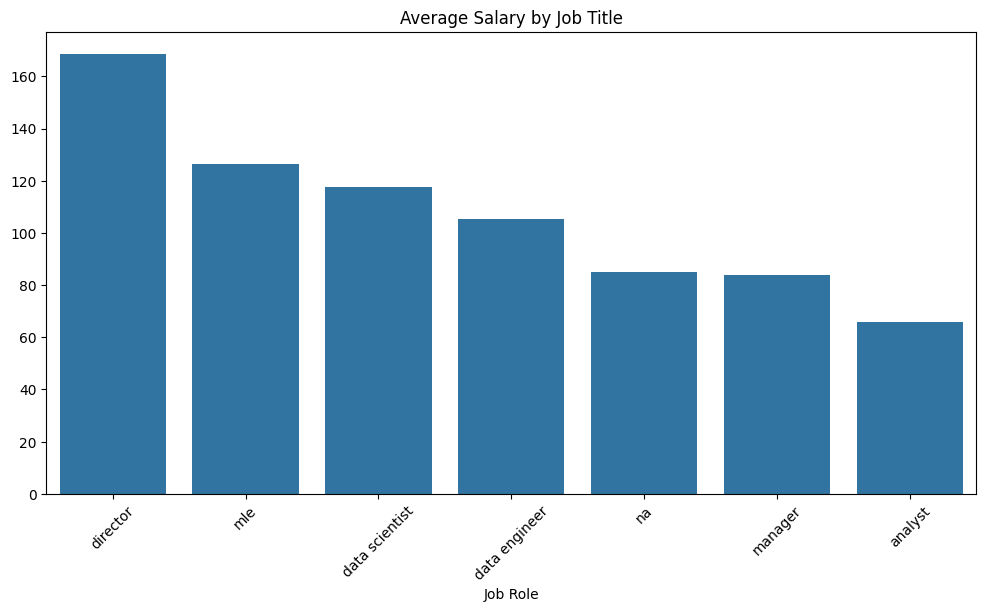

In [72]:
#average salary by job role
df_sorted = df.groupby('Job Role')['avg_salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=df_sorted.index, y=df_sorted.values)
plt.title("Average Salary by Job Title")
plt.xticks(rotation=45)
plt.show()

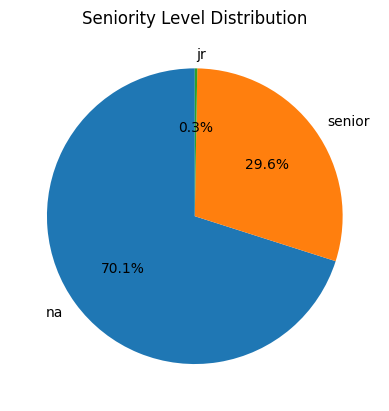

In [73]:
#distribution of seniority levels
seniority_counts = df['Seniority Level'].value_counts()
plt.pie(seniority_counts, labels=seniority_counts.index, autopct='%1.1f%%',startangle=90)
plt.title("Seniority Level Distribution")
plt.show()

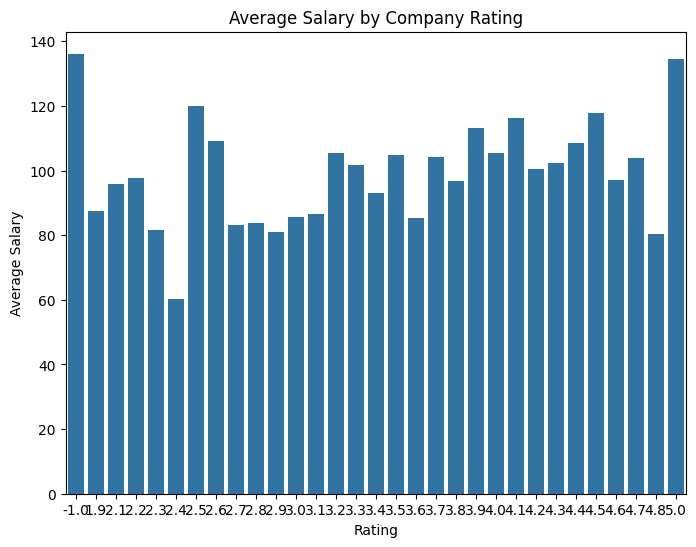

In [74]:
avg_salary = df.groupby('Rating')['avg_salary'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Rating', y='avg_salary', data=avg_salary)
plt.title("Average Salary by Company Rating")
plt.xlabel("Rating")
plt.ylabel("Average Salary")
plt.show()


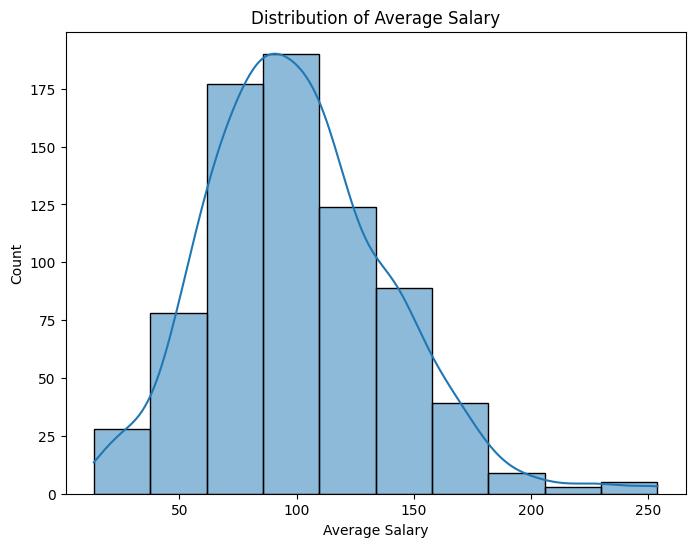

In [75]:
#distribution of average salary
plt.figure(figsize=(8,6))
sns.histplot(df['avg_salary'],bins=10, kde=True)
plt.title("Distribution of Average Salary")
plt.xlabel("Average Salary")
plt.ylabel("Count")
plt.show()

In [76]:
#encode categorical seniority level into numeric form
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Seniority Level'] = le.fit_transform(df['Seniority Level'])

In [77]:
#one-hot encoding of categorical features; convert into dummy variables
df = pd.get_dummies(df, columns=['Job Role', 'Size', 'job_state','Type of ownership', 'Industry','Sector','Revenue'],drop_first=True)

In [78]:
#define features(X) and target(y)
X = df.drop('avg_salary',axis=1)
y = df['avg_salary']

In [79]:
#split dataset into training and testing set(80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
#train model
rfr.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [82]:
#predict on test data
y_pred = rfr.predict(X_test)

In [83]:
#calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 358.03961023431634
Root Mean Squared Error: 18.92193463243958
R^2 Score: 0.7809500407668317


Comparison with other models

In [84]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

models = {
    "Random Forest": rfr,
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Support Vector Regression": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1),
}

results={}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "RMSE": rmse, "R^2": r2}

results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print(results_df)

                                 MSE     RMSE     R^2
Random Forest               358.0396  18.9219  0.7810
XGBoost                     447.0567  21.1437  0.7265
Linear Regression           766.6551  27.6885  0.5310
K-Nearest Neighbors        1076.3790  32.8082  0.3415
Support Vector Regression   569.0690  23.8552  0.6518


In [85]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rfr, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R^2 Score: {cv_scores.mean()}")


Cross-Validation R^2 Scores: [0.47688931 0.64007616 0.82180422 0.81984521 0.61155014]
Mean Cross-Validation R^2 Score: 0.6740330092271417


In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators' : randint(100,300),
    'max_depth' : [None,5,10,15],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'max_features':['sqrt','log2',None]
}

random_search = RandomizedSearchCV(
    rfr,
    param_distributions=param_distributions,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 234}


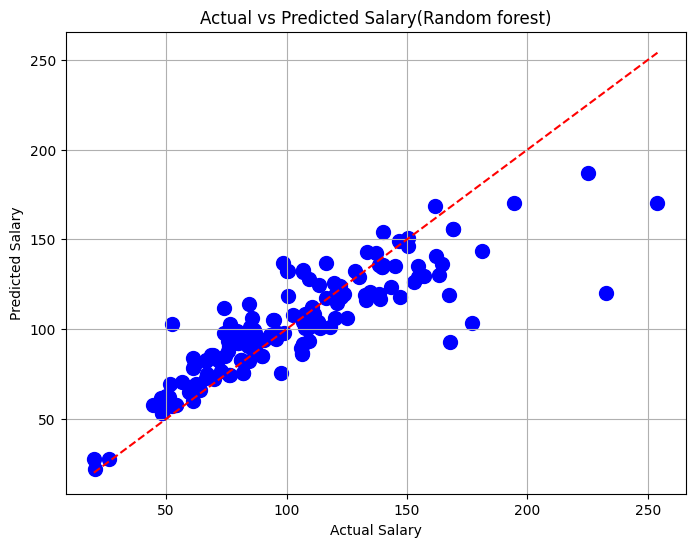

In [87]:
#Visualization of predictions 
y_pred_final = best_model.predict(X_test)

plt.figure(figsize=(8,6)) 
plt.scatter(y_test, y_pred_final, color='blue',s=100) 
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'r--') 
plt.xlabel('Actual Salary') 
plt.ylabel('Predicted Salary') 
plt.title('Actual vs Predicted Salary(Random forest)') 
plt.grid(True) 



In [88]:
import joblib

joblib.dump(best_model, 'rfr_prediction_model.pkl')

joblib.dump(le, 'seniority_encoder.pkl')

training_columns = df.drop('avg_salary', axis=1).columns
joblib.dump(training_columns, 'training_columns.pkl')

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']